# zillow-prize-prediction

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

<IPython.core.display.Javascript object>

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="zillow-prize-prediction")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vponsairaam/zillow-prize-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vponsairaam/zillow-prize-prediction


'https://jovian.ai/vponsairaam/zillow-prize-prediction'

# DataSet:      Zillow Prize:Zillow’s Home Value Prediction (Zestimate)


**“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error**

## Problem Statement:
You are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.
The train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.
The test data in the public leaderboard has the rest of the transactions between October 15 and December 31, 2016.
The rest of the test data, which is used for calculating the private leaderboard, is all the properties in October 15, 2017, to December 15, 2017. You are asked to predict 6 time points for all properties: October 2016 (201610), November 2016 (201611), December 2016 (201612), October 2017 (201710), November 2017 (201711), and December 2017 (201712).

# Modelling objective: Building a model to imporve the Zestimate residual error.


# Importing the necessary libraries and loading the data

In [4]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [5]:
od.download('https://www.kaggle.com/c/zillow-prize-1/data')

Skipping, found downloaded files in ".\zillow-prize-1" (use force=True to force download)


Note: The dataset was downloaded when the notebook was run earlier

In [6]:
os.listdir('zillow-prize-1')

['properties_2016.csv',
 'properties_2017.csv',
 'sample_submission.csv',
 'train_2016_v2.csv',
 'train_2017.csv',
 'zillow_data_dictionary.xlsx']

In [7]:
train_df = pd.read_csv("./zillow-prize-1/train_2016_v2.csv")

In [8]:
prop = pd.read_csv("./zillow-prize-1/properties_2016.csv")

In [9]:
samp = pd.read_csv("./zillow-prize-1/sample_submission.csv")  

In [10]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         90275 non-null  int64  
 1   logerror         90275 non-null  float64
 2   transactiondate  90275 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [12]:
prop.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [13]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   parcelid                      int64  
 1   airconditioningtypeid         float64
 2   architecturalstyletypeid      float64
 3   basementsqft                  float64
 4   bathroomcnt                   float64
 5   bedroomcnt                    float64
 6   buildingclasstypeid           float64
 7   buildingqualitytypeid         float64
 8   calculatedbathnbr             float64
 9   decktypeid                    float64
 10  finishedfloor1squarefeet      float64
 11  calculatedfinishedsquarefeet  float64
 12  finishedsquarefeet12          float64
 13  finishedsquarefeet13          float64
 14  finishedsquarefeet15          float64
 15  finishedsquarefeet50          float64
 16  finishedsquarefeet6           float64
 17  fips                          float64
 18  fireplacecnt          

# Exporatory Data Analysis

**We plot a scatter plot of the log error**

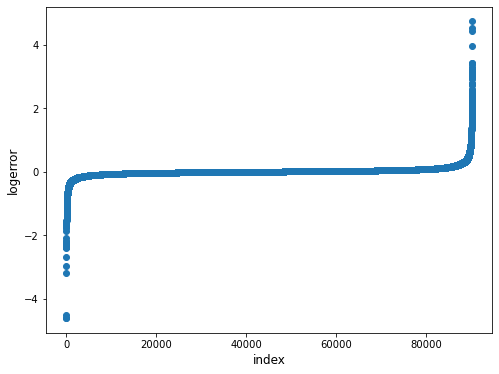

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

**The Plot is almost a straight line except for some outliers on both the ends**

**Now , we remove the outliers and do plot a histogram on the same**

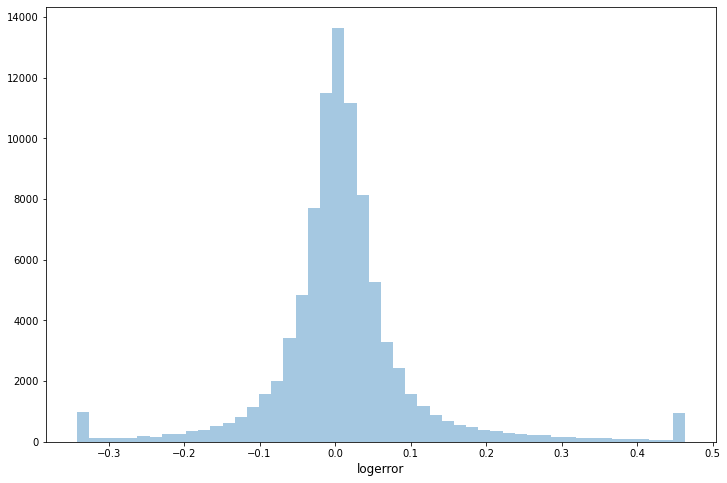

In [15]:
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)
train_df['logerror'].loc[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].loc[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

**As we can see the log-error follows a normal distribution**

**Lets check the number of transactions per month with a Histogram**

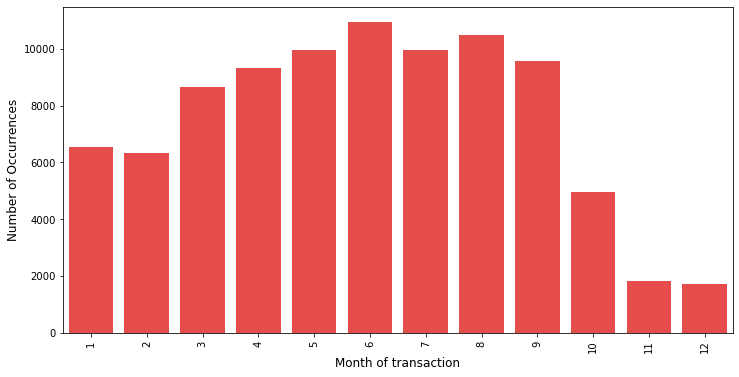

In [16]:
train_df['transactiondate']=pd.to_datetime(train_df['transactiondate'])
train_df['transaction_month'] = train_df['transactiondate'].dt.month

cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

**Note: In this process we have created a new feature called 'transaction_month' this feature will be used to train our models later**

**From this we infer the given training set has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016 and the test data in the public leaderboard has the rest of the transactions between October 15 and December 31, 2016 (as per the problem statement)**

**Parcel Id**

In [17]:
(train_df['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

**So most of the parcelids occur only once in the dataset**

 **Let us explore the properties_2016.csv**

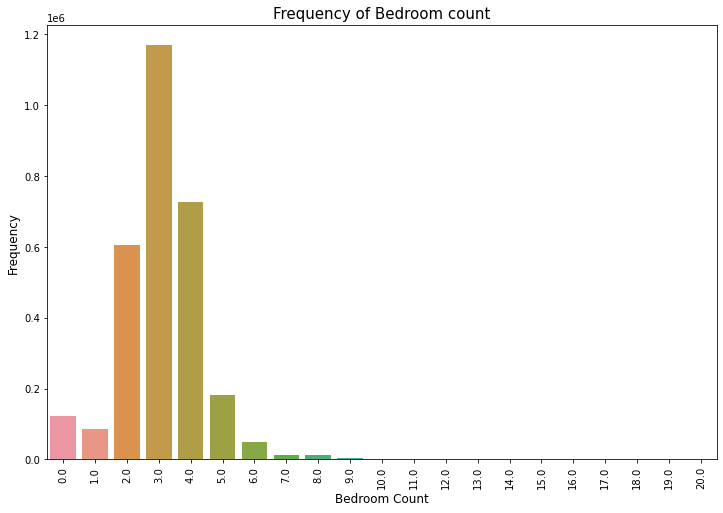

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=prop)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

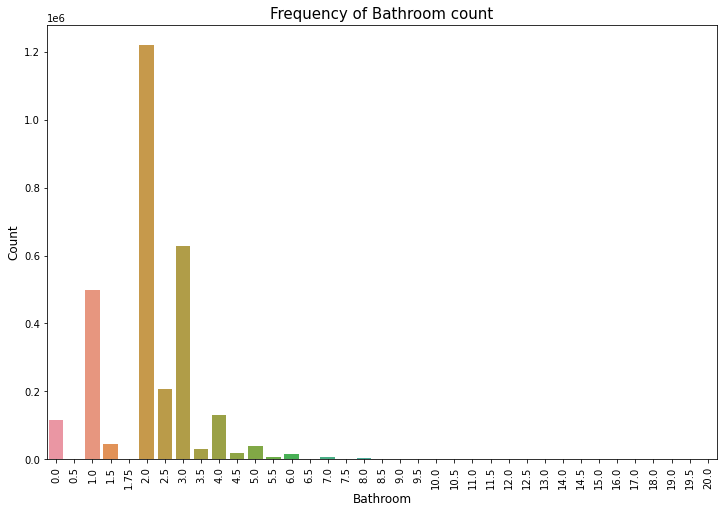

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=prop)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

**Missing Values in the properties dataframe we make plots to analyse the same**

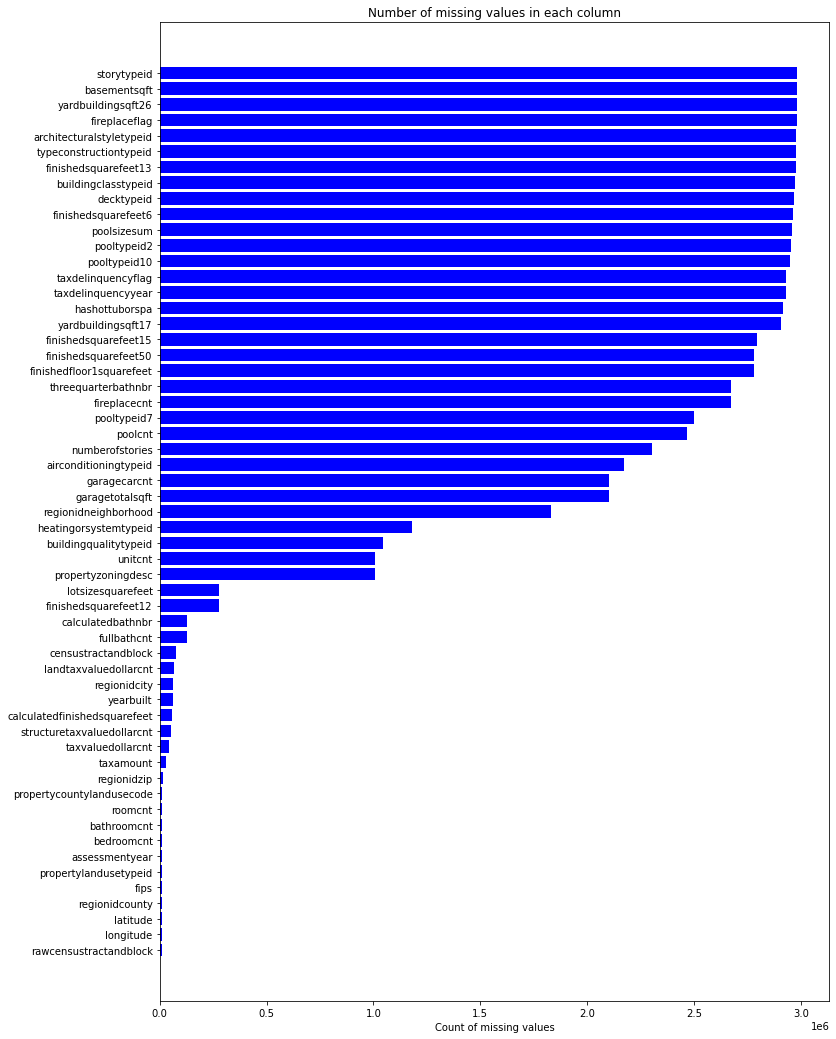

In [20]:
missing_df = prop.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [21]:
train_df = pd.merge(train_df, prop, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      90275 non-null  int64         
 1   logerror                      90275 non-null  float64       
 2   transactiondate               90275 non-null  datetime64[ns]
 3   transaction_month             90275 non-null  int64         
 4   airconditioningtypeid         28781 non-null  float64       
 5   architecturalstyletypeid      261 non-null    float64       
 6   basementsqft                  43 non-null     float64       
 7   bathroomcnt                   90275 non-null  float64       
 8   bedroomcnt                    90275 non-null  float64       
 9   buildingclasstypeid           16 non-null     float64       
 10  buildingqualitytypeid         57364 non-null  float64       
 11  calculatedbathnbr           

In [23]:
train_df.shape

(90275, 61)

# Our Training set conatins 90275 rows and  61 columns

In [24]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


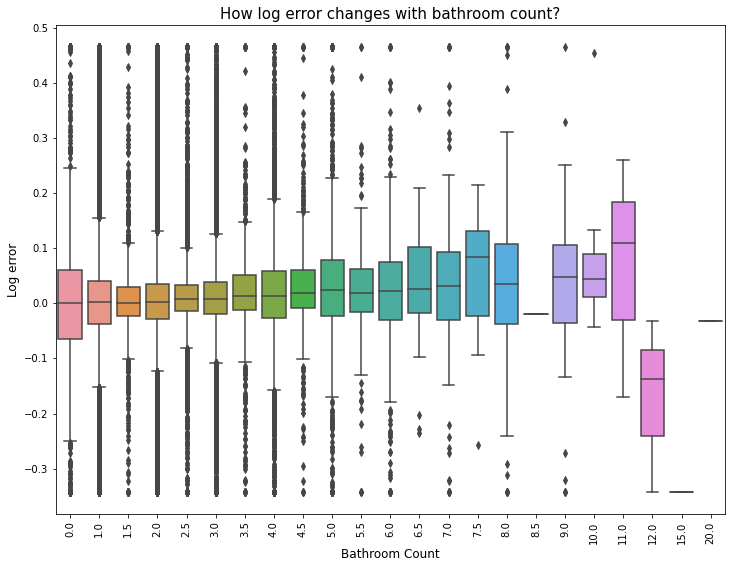

In [25]:
plt.figure(figsize=(12,9))
sns.boxplot(x='bathroomcnt', y = 'logerror', data = train_df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

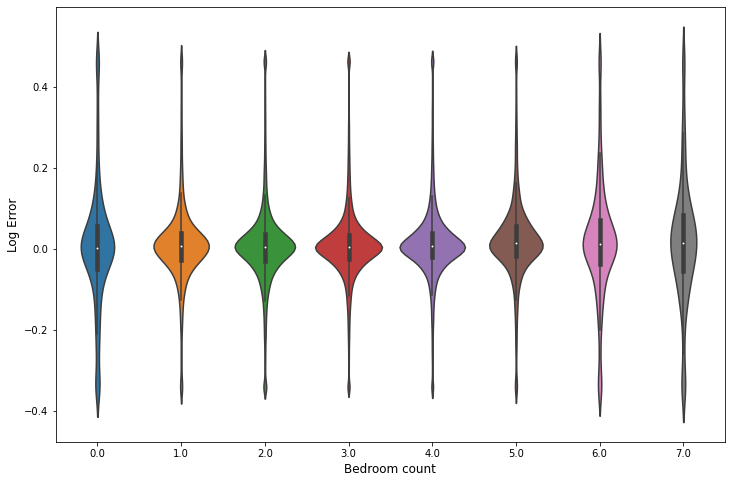

In [26]:
train_df['bedroomcnt'].loc[train_df['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_df)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

In [27]:
pd.options.display.max_rows = 50

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
...,...,...
56,landtaxvaluedollarcnt,float64
57,taxamount,float64
58,taxdelinquencyflag,object
59,taxdelinquencyyear,float64


In [28]:
dtype_df.groupby("Column Type").count()

,Count
Column Type,
int64,2
float64,53
datetime64[ns],1
object,5


# Univariate Analysis

**We do this to get an idea about the correlation of different features with the targets**

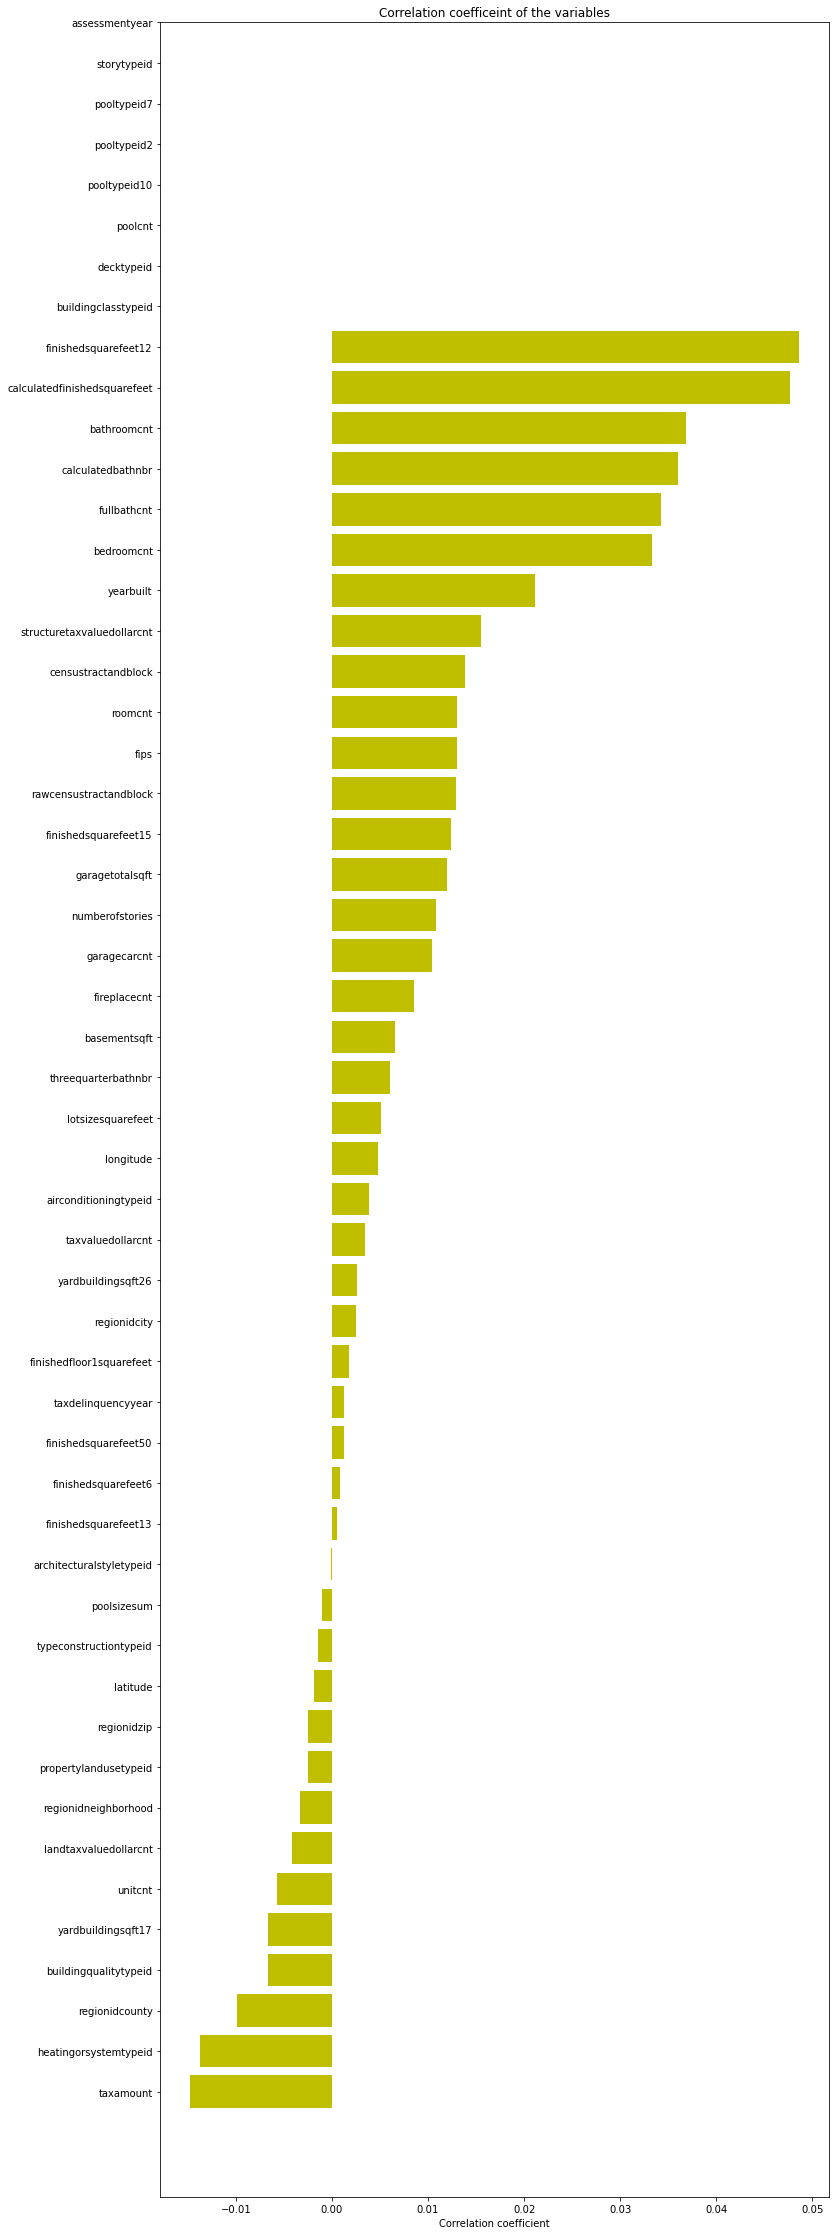

In [29]:
mean_values = train_df.mean(axis=0)
train_df.fillna(mean_values, inplace=True)
train_df_new = train_df
x_cols = [col for col in train_df_new.columns 
          if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, 
                             train_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation= 'horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficeint of the variables")
plt.show()

**Note: In this we have imputed the float columns with mean, the same will be used towards the training of the model**

In [30]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.033329
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


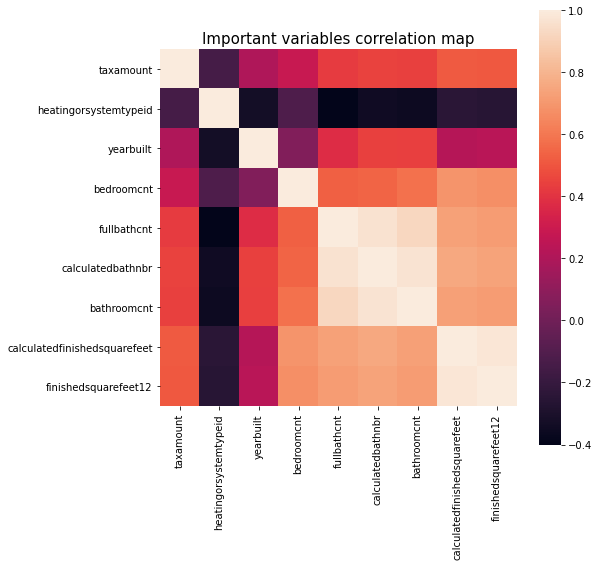

In [31]:
cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

**This heatmap gives us a clear picture of correlation between different important variables**

# Feature Engineering

**Identifying the categorical columns and encode them and impute the missling values**

In [32]:
cat_cols = train_df.select_dtypes(include='object').columns.tolist()

In [33]:
cat_cols

['hashottuborspa',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'fireplaceflag',
 'taxdelinquencyflag']

In [34]:
train_df['hashottuborspa'] = train_df["hashottuborspa"].apply(lambda x: 0 if np.isnan(x) else 1).astype(float)
cat_cols.remove('hashottuborspa')

In [35]:
train_df.fillna(-1,inplace=True)

In [36]:
train_df

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.000000,7.229885,713.581395,2.0,3.0,4.0,4.000000,2.0,66.0,1347.974037,1684.0,1684.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,1.0,2.000000,34280990.0,-118488536.0,7528.0,1.0,519.827657,1.0,1.0,1.0,0100,261.0,LARS,6.037107e+07,12447.000000,3101.0,31817.000000,96370.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1959.0,1.440739,1.0,122754.0,360170.0,2015.0,237416.0,6735.88,-1,13.402692,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,1.816372,7.229885,713.581395,3.5,4.0,4.0,5.565407,3.5,66.0,1347.974037,2263.0,2263.000000,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,3.0,2.000000,468.000000,1.0,3.926979,33668120.0,-117677556.0,3643.0,1.0,519.827657,1.0,1.0,1.0,1,261.0,-1,6.059052e+07,32380.000000,1286.0,190646.540237,96962.0,0.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,2014.0,1.440739,1.0,346458.0,585529.0,2015.0,239071.0,10153.02,-1,13.402692,6.049151e+13
2,12098116,-0.0040,2016-01-01,1,1.000000,7.229885,713.581395,3.0,2.0,4.0,4.000000,3.0,66.0,1347.974037,2217.0,2217.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,3.0,1.812005,345.521228,1.0,2.000000,34136312.0,-118175032.0,11423.0,1.0,519.827657,1.0,1.0,1.0,0100,261.0,PSR6,6.037464e+07,47019.000000,3101.0,275411.000000,96293.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1940.0,1.440739,1.0,61994.0,119906.0,2015.0,57912.0,11484.48,-1,13.402692,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.000000,7.229885,713.581395,2.0,2.0,4.0,4.000000,2.0,66.0,1347.974037,839.0,839.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,2.0,1.812005,345.521228,1.0,2.000000,33755800.0,-118309000.0,70859.0,1.0,519.827657,1.0,1.0,1.0,010C,266.0,LAR3,6.037296e+07,12447.000000,3101.0,54300.000000,96222.0,0.0,7.0,1.008743,6.010033,1.000000,310.142101,311.694737,1987.0,1.440739,1.0,171518.0,244880.0,2015.0,73362.0,3048.74,-1,13.402692,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,1.816372,7.229885,713.581395,2.5,4.0,4.0,5.565407,2.5,66.0,1347.974037,2283.0,2283.000000,1404.545455,2380.090067,1355.546674,2302.546318,6059.0,1.187884,2.0,2.000000,598.000000,1.0,3.926979,33485643.0,-117700234.0,6000.0,1.0,519.827657,1.0,1.0,1.0,122,261.0,-1,6.059042e+07,17686.000000,1286.0,190646.540237,96961.0,8.0,7.0,1.000000,6.010033,1.110414,310.142101,311.694737,1981.0,2.000000,1.0,169574.0,434551.0,2015.0,264977.0,5488.96,-1,13.402692,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,12,1.000000,7.229885,713.581395,1.0,1.0,4.0,4.000000,1.0,66.0,1347.974037,653.0,653.000000,1404.545455,2380.090067,1355.546674,2302.546318,6037.0,1.187884,1.0,1.812005,345.521228,1.0,2.000000,34203000.0,-118562000.0,93676.0,1.0,519.827657,1.

# Training our models

**We identify and create input and target columns for our model before we fit it into the model**

In [37]:
train_y = train_df['logerror'].values
cat_cols = ["propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_x = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)
feat_names = train_df.columns.values

# Reducing Memory Usage

**As the data occupies significant amount of memory we create a function reduce_mem_usage to reduce memory usage**

In [38]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [39]:
reduce_mem_usage(train_x)

Memory usage of properties dataframe is : 39.20781707763672  MB
******************************
Column:  airconditioningtypeid
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  architecturalstyletypeid
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  basementsqft
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  bathroomcnt
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  bedroomcnt
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  buildingclasstypeid
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  buildingqualitytypeid
dtype before:  float64
dtype after:  float32
******************************
***

(       airconditioningtypeid  architecturalstyletypeid  basementsqft  \
 0                   1.000000                  7.229885    713.581421   
 1                   1.816372                  7.229885    713.581421   
 2                   1.000000                  7.229885    713.581421   
 3                   1.000000                  7.229885    713.581421   
 4                   1.816372                  7.229885    713.581421   
 ...                      ...                       ...           ...   
 90270               1.000000                  7.229885    713.581421   
 90271               1.816372                  7.229885    713.581421   
 90272               1.816372                  7.229885    713.581421   
 90273               1.816372                  7.229885    713.581421   
 90274               1.816372                  7.229885    713.581421   
 
        bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
 0              2.0           3            

In [40]:
train_x.shape 

(90275, 53)

In [41]:
train_y.shape

(90275,)

**train_x contains features and train_y contains the targets** 

#  In this project we will be training 2 models Namely :Random Forest Regressor and XGB Regressor

# For validation we will use Grid Search cross validation strategy for both the models

<h2>Grid Search cross-validation is a technique to select the best of the machine learning model, parameterized by a grid of hyperparameters. Scikit-Learn library comes with grid search cross-validation implementation.
Grid Search CV tries all combinations of parameters grid for a model and returns with the best set of parameters having the best performance score.<h2> 

**For details and documentation refer:** 
- https://towardsdatascience.com/20x-times-faster-grid-search-cross-validation-19ef01409b7c
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# Random forest regressor

**For details and Documentation refer:**
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://medium.com/swlh/random-forest-and-its-implementation-71824ced454f
 
**Note: This model has been covered in Machine Learning with Python: Zero to GBMs course**


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
prop['hashottuborspa'] = prop["hashottuborspa"].apply(lambda x: 0 if np.isnan(x) else 1).astype(float)

In [44]:
reduce_mem_usage(prop)

Memory usage of properties dataframe is : 1320.9732208251953  MB
******************************
Column:  parcelid
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  airconditioningtypeid
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  architecturalstyletypeid
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  basementsqft
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  bathroomcnt
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  bedroomcnt
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  buildingclasstypeid
dtype before:  float64
dtype after:  uint8
******************************
***********************

(          parcelid  airconditioningtypeid  architecturalstyletypeid  \
 0         10754147                      0                         1   
 1         10759547                      0                         1   
 2         10843547                      0                         1   
 3         10859147                      0                         1   
 4         10879947                      0                         1   
 ...            ...                    ...                       ...   
 2985212  168176230                      0                         1   
 2985213   14273630                      0                         1   
 2985214  168040630                      0                         1   
 2985215  168040830                      0                         1   
 2985216  168040430                      0                         1   
 
          basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
 0                  19          0.0           0               

In [45]:
prop = prop.select_dtypes(exclude=[object]) 
prop.fillna(-1,inplace=True)
test = samp.loc[:,['ParcelId']].merge(prop,how='left',left_on='ParcelId',right_on='parcelid')
test_x = test.drop(['ParcelId','parcelid'],axis=1,inplace=False)

**Here we use the Grid search cross validation to validate the model and tune the hyper parameters n_estimators and max_depth and use the variable 'grid' to implement the same** 

In [46]:
%%time
parameters = {'n_estimators':[5,10,15],'n_jobs':[-1],'oob_score':[False],'max_depth':[5,10,50],'random_state':[2]}  
rfr_model = RandomForestRegressor()
grid = GridSearchCV(rfr_model,param_grid=parameters,scoring='neg_mean_absolute_error',cv=4)  
grid.fit(train_x,train_y)

Wall time: 3min 28s


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 50], 'n_estimators': [5, 10, 15],
                         'n_jobs': [-1], 'oob_score': [False],
                         'random_state': [2]},
             scoring='neg_mean_absolute_error')

**We have created 4 splits for the crossvalidation by setting cv=4**

**Here the 'scoring' or the strategy to evaluate the performance of the cross-validated model on the test set is neg_mean_absolute_error(negative mean absolute error) the grid search model selects the combination of parameters having the best score**

**To learn more about negative mean absolute error visit:**
- https://stackoverflow.com/questions/55786121/what-is-the-negative-mean-absolute-error-in-scikit-learn#:~:text=As%20its%20name%20implies%2C%20negative,than%20a%20value%20of%20%2D3.0%20.

  param_n_estimators param_max_depth  mean_test_score  std_test_score
0                  5               5        -0.060288        0.002086
1                 10               5        -0.060226        0.002088
2                 15               5        -0.060217        0.002095
3                  5              10        -0.060704        0.002091
4                 10              10        -0.060477        0.002086
5                 15              10        -0.060391        0.002100
6                  5              50        -0.071816        0.002101
7                 10              50        -0.067225        0.001918
8                 15              50        -0.065498        0.001950


<AxesSubplot:xlabel='feat'>

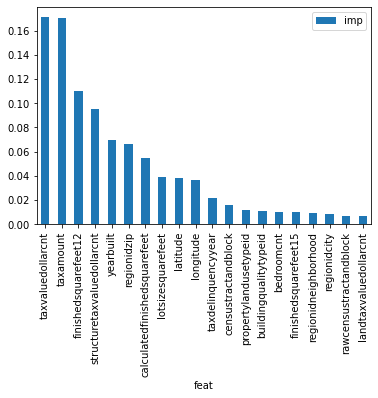

In [47]:
cv_results = pd.DataFrame(grid.cv_results_)
print(cv_results[["param_n_estimators","param_max_depth","mean_test_score","std_test_score"]])
feat_imps = grid.best_estimator_.feature_importances_
fi = pd.DataFrame.from_dict({'feat':train_x.columns,'imp':feat_imps})
fi.set_index('feat',inplace=True,drop=True)
fi = fi.sort_values('imp',ascending=False)
fi.head(20).plot.bar()

**We have evaluated different combinations of hyper parameters and viewed their scores and we have plotted a bar plot of the 20 most important features in the model**

**To learn more about neg_mean_absolute_error , mean_test_score and std_test_score refer:**
- https://scikit-learn.org/stable/modules/model_evaluation.html
- https://stackoverflow.com/questions/44947574/what-is-the-meaning-of-mean-test-score-in-cv-result
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html


In [48]:
test_x = test_x.select_dtypes(exclude=[object])

In [49]:
import re
import datetime

<h2> Predicting and Writing the Submission File as per the given format</h2>


In [50]:
%%time
test_y = grid.predict(test_x)
test_y = pd.DataFrame(test_y)
test_y[1] = test_y[0]
test_y[2] = test_y[0]
test_y[3] = test_y[0]
test_y[4] = test_y[0]
test_y[5] = test_y[0]  #For simplicity make identical predictions for all months
test_y.columns = ["201610","201611","201612","201710","201711","201712"]
submission = test_y.copy()
submission["parcelid"] = samp["ParcelId"].copy()
cols = ["parcelid","201610","201611","201612","201710","201711","201712"]
submission = submission[cols]
filename = "RFR_Prediction_" + str(submission.columns[0]) + re.sub("[^0-9]", "",str(datetime.datetime.now())) + '.csv'
print(filename)
submission.to_csv(filename,index=False)


RFR_Prediction_parcelid20210909214529428011.csv
Wall time: 45.2 s


 **The kaggle score is 0.06941 which is a good score**

# XGB regressor

**For details and documentation refer:**
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://xgboost.readthedocs.io/en/latest/python/python_api.html

**Note: This model has been covered in Machine Learning with Python: Zero to GBMs course**

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [52]:
gb_regressor_params = {
    'n_estimators':[50,100], 
     'n_jobs':[-1],
    'max_depth':[1,10,12], 
    'random_state':[0], 
}

**Here we use the Grid search cross validation to validate the model and tune the hyper parameters n_estimators and max_depth and we use variable 'grid1' to implement the same**

In [53]:
%%time
xgbr_model = XGBRegressor(n_jobs=-1)
grid1 = GridSearchCV(xgbr_model,param_grid=gb_regressor_params,scoring='neg_mean_absolute_error',cv=4)  
grid1.fit(train_x,train_y)

Wall time: 4min 52s


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

**We have created 4 splits for the crossvalidation by setting cv=4**

  param_n_estimators param_max_depth  mean_test_score  std_test_score
0                 50               1        -0.060209        0.002098
1                100               1        -0.060212        0.002079
2                 50              10        -0.062772        0.002016
3                100              10        -0.064587        0.001967
4                 50              12        -0.063856        0.002069
5                100              12        -0.066001        0.001847


<AxesSubplot:xlabel='feat'>

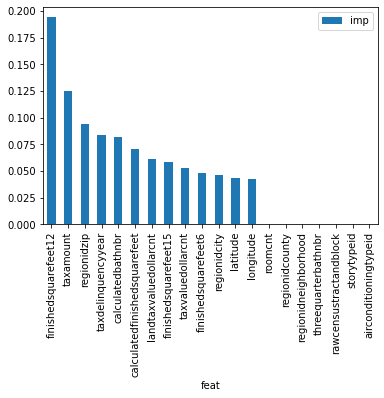

In [54]:
cv_results = pd.DataFrame(grid1.cv_results_)
print(cv_results[["param_n_estimators","param_max_depth","mean_test_score","std_test_score"]])
feat_imps = grid1.best_estimator_.feature_importances_
fi = pd.DataFrame.from_dict({'feat':train_x.columns,'imp':feat_imps})
fi.set_index('feat',inplace=True,drop=True)
fi = fi.sort_values('imp',ascending=False)
fi.head(20).plot.bar()

**We have evaluated different combinations of hyper parameters and viewed their scores and we have plotted a bar plot of the 20 most important features in the model**

<h2> Predicting and Making the Submission File as per the given format</h2>


In [55]:
test_y = grid1.predict(test_x)
test_y = pd.DataFrame(test_y)
test_y[1] = test_y[0]
test_y[2] = test_y[0]
test_y[3] = test_y[0]
test_y[4] = test_y[0]
test_y[5] = test_y[0]  #For simplicity make identical predictions for all months
test_y.columns = ["201610","201611","201612","201710","201711","201712"]
submission = test_y.copy()
submission["parcelid"] = samp["ParcelId"].copy()
cols = ["parcelid","201610","201611","201612","201710","201711","201712"]
submission = submission[cols]
filename = "XGBR_Prediction_" + str(submission.columns[0]) + re.sub("[^0-9]", "",str(datetime.datetime.now())) + '.csv'
print(filename)
submission.to_csv(filename,index=False)

XGBR_Prediction_parcelid20210909215230190674.csv


**The Kaggle Score is 0.06611 which is better than the score we got from random Forest regressor**

# Making Sample Predictions

**For this we will be using the 2017 data**

In [56]:
data_2017 = pd.read_csv("./zillow-prize-1/train_2017.csv")

In [57]:
prop_2017 = pd.read_csv("./zillow-prize-1/properties_2017.csv")

In [58]:
reduce_mem_usage(prop_2017)

Memory usage of properties dataframe is : 1320.9732208251953  MB
******************************
Column:  parcelid
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  airconditioningtypeid
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  architecturalstyletypeid
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  basementsqft
dtype before:  float64
dtype after:  uint16
******************************
******************************
Column:  bathroomcnt
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  bedroomcnt
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  buildingclasstypeid
dtype before:  float64
dtype after:  uint8
******************************
***********************

(         parcelid  airconditioningtypeid  architecturalstyletypeid  \
 0        10754147                      0                         1   
 1        10759547                      0                         1   
 2        10843547                      0                         1   
 3        10859147                      0                         1   
 4        10879947                      0                         1   
 ...           ...                    ...                       ...   
 2985212  12170430                      0                         1   
 2985213  11422430                      0                         1   
 2985214  17203030                      0                         1   
 2985215  14242830                      0                         1   
 2985216  12766630                      0                         1   
 
          basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
 0                  19          0.0           0                    0   
 1

In [59]:
sample_prediction = pd.merge(data_2017,prop_2017,on='parcelid', how='left')
sample_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77613 entries, 0 to 77612
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   logerror                      77613 non-null  float64
 2   transactiondate               77613 non-null  object 
 3   airconditioningtypeid         77613 non-null  uint8  
 4   architecturalstyletypeid      77613 non-null  uint8  
 5   basementsqft                  77613 non-null  uint16 
 6   bathroomcnt                   77613 non-null  float32
 7   bedroomcnt                    77613 non-null  uint8  
 8   buildingclasstypeid           77613 non-null  uint8  
 9   buildingqualitytypeid         77613 non-null  uint8  
 10  calculatedbathnbr             77613 non-null  float32
 11  decktypeid                    77613 non-null  uint8  
 12  finishedfloor1squarefeet      77613 non-null  uint16 
 13  c

In [60]:
sample_prediction['hashottuborspa'] = sample_prediction["hashottuborspa"].apply(lambda x: 0 if np.isnan(x) else 1).astype(float)
sample_prediction['transactiondate']=pd.to_datetime(sample_prediction['transactiondate'])

sample_prediction['transaction_month'] = sample_prediction['transactiondate'].dt.month

In [61]:
test_samp = sample_prediction.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)

 **Now we use our models to make predictions with the 2017 data**

In [62]:
xgbr_sample_prediction = grid1.predict(test_samp)

In [63]:
rfr_sample_prediction = grid.predict(test_samp)

**We see the first prediction from each model and compare it with the actualtarget value in the dataset**

In [64]:
xgbr_sample_prediction[0]

0.01152077

In [65]:
rfr_sample_prediction[0]

0.042278538794934734

In [66]:
y  = sample_prediction['logerror']

In [67]:
y[0]

0.0255949017584

 **We see that the value predicted by The Gradient Boost model is more close to the actual value than the random forest regressor**

**The score of the Gradient Boost model is evaluated using grid1.score(test_samp,y) and the score of the Random Forest is evaluated using grid.score(test_samp,y)**

In [68]:
grid1.score(test_samp,y)

-0.07022466918712349

In [69]:
grid.score(test_samp,y)

-0.07468535427737932

**Remember the scoring technique we used is called negative mean absolute error, therefore the lower the value of the score the better the model is.**

**Thus we can see that both models have fared well**

**For more details refer:-**
- https://stackoverflow.com/questions/55786121/what-is-the-negative-mean-absolute-error-in-scikit-learn#:~:text=As%20its%20name%20implies%2C%20negative,than%20a%20value%20of%20%2D3.0%20.

**The score of our XGBRegressor is : -0.07022466918712349**

**The score of The Random forest is : -0.07468535427737932**

**Once again we see that XGB regressor outperforms Randomforest Regressor with a better score in the 2017 data**


# Saving our model as a joblib file

In [70]:
import joblib

In [71]:
important_data = {
    'rfr_model':grid,
    'xgbr_model': grid1,
    'input_cols': train_x,
    'target_col': train_y,
    'categorical_cols': cat_cols,
}

In [72]:
joblib.dump(important_data, 'important_data.joblib')

['important_data.joblib']

## Saving the project and submitting it

In [73]:
jovian.commit(project="zillow-prize-prediction")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vponsairaam/zillow-prize-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vponsairaam/zillow-prize-prediction


'https://jovian.ai/vponsairaam/zillow-prize-prediction'

In [74]:
jovian.submit(assignment="zerotogbms-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "vponsairaam/zillow-prize-prediction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/vponsairaam/zillow-prize-prediction
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/course-project-real-world-machine-learning-model


# Summary
**In this project we have:**
 - Downloaded a realworld data from kaggle
 - Carried out Exploratory Data Analysis and Univariate Analysis
 - Done feature engineering
 - Created a function to reduce memory usage 
 - Trained two models: Random Forest Regressor and XGB Regressor
 - Used Grid Search cross validation as a validation strategy
 - Tuned two hyper parameters for each model namely: n_estimators and max_depth
 - Made Submission files and found the kaggle score , on comparison XGB regressor gives a better kaggle score
 - Made sample predictions using 2017 data and checked the score of both the models, once again XGB Regressor outperforms Random Forest
 - Saved the model as a joblib file for future use

# Conclusion
<h2>On analysing the Kaggle score and performance on the 2017 data, we can conclude that the XGB regressor outperforms Random Forest Regressor and the XGB regressor is best suited for this problem<h2>

# References


**Relevant Notebooks:**
- https://www.kaggle.com/kimhyelin/zillow-prize-zillow-s-home-value-prediction-hl
- https://www.kaggle.com/captcalculator/a-very-extensive-zillow-exploratory-analysis
- https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
- https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65
- https://www.kaggle.com/arjanso/simple-starter-randomforest-regressor
- https://www.kaggle.com/jamesdhope/zillow-ensemble-of-regressors-0-065
- https://www.kaggle.com/nikunjm88/carefully-dealing-with-missing-values
- https://www.kaggle.com/anokas/simple-xgboost-starter-0-0655

**Youtube Videos:**
- https://www.youtube.com/watch?v=HdlDYng8g9s

## My Suggestions for future work
- Using ML algorithms to predict Natural calimities like tsunami , volcanic erruptions, Eartquake etc.
- Using ML Models to predict economic growth
- Using MMl algorithms to predict road traffic and classify areas with high traffic